# Sessie 7 - Interpolatie

Voer de onderstaande code uit.

In [114]:
%matplotlib inline

import csv
import math
import numpy as np

from matplotlib import pyplot as plt

In [115]:
def list2column(v):
    """Transponeer een lijst van elementen naar een kolomvector."""
    return np.asmatrix(v).transpose()

def column2list(v):
    """Transponeer een kolomvector naar een lijst van elementen."""
    return np.array(v.transpose())[0]

## 1. Algemene lineaire interpolatie

In de cursus hebben we gezien dat we een functie $f(x)$ kunnen benaderen door punten $(x_i, f_i)$ d.m.v. een lineaire interpolatie functie

$$y(x) = \sum\limits_j a_j\Phi_j(x)\ \text{ waarbij }\ y(x_i) = f_i$$

met onbekenden $a_j$ en basisfuncties $\Phi_j(x)$.
Zo geeft $\Phi_j(x) = |x - x_j|$ een stuksgewijze lineaire interpolatie.

Implementeer een methode dat, gegeven een reeks basisfuncties, een interpolatiefunctie berekent voor een functie $f(x)$ door de punten $(x_i, f_i)$.

In [116]:
def create_linear_bf(x_j):
    """Create a linear basis function."""
    return lambda x: abs(x - x_j)

def interpolate(xis, fis, phis):
    """Return an interpolation through points (xi, fi) with basis functions phis."""
    ### CODE HERE ###
    # Ax = b, we zoeken x daar zitten de atjes in
    A = np.asmatrix([[phi(xi) for phi in phis] for xi in xis])
    print(A)
    # atjes = np.dot(np.linalg.inv(A), fis)
    atjes = np.linalg.solve(A, fis)

    def y(x):
        ### CODE HERE ###
        return sum(a * phi(x) for a, phi in zip(atjes, phis))

    return y

[[ 0  1  3  6  9 11]
 [ 1  0  2  5  8 10]
 [ 3  2  0  3  6  8]
 [ 6  5  3  0  3  5]
 [ 9  8  6  3  0  2]
 [11 10  8  5  2  0]]


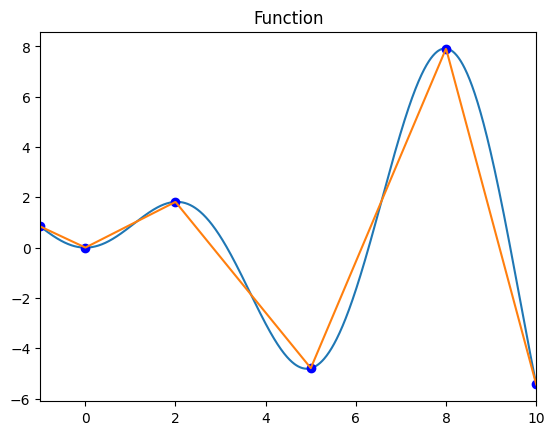

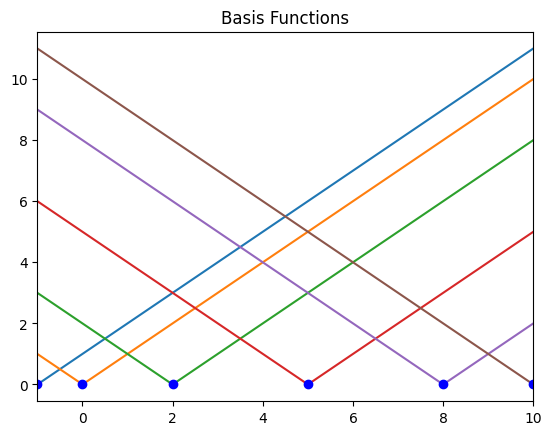

In [117]:
### TEST ###

# Function f
f = lambda x: x*math.sin(x)
xs = np.linspace(-1, 10, 1000)
fs = list(map(f, xs))
plt.title('Function')
plt.plot(xs, fs)

# Data points (xi, fi)
xis = [-1, 0, 2, 5, 8, 10]
fis = list(map(f, xis))
plt.plot(xis, fis, 'bo')

# !! Create linear BFs centered around xi !!
phis = list(map(create_linear_bf, xis))

# Interpolate through (xi, fi) using basis functions phi
y = interpolate(xis, fis, phis)
ys = list(map(y, xs))
plt.plot(xs, ys)
plt.xlim(-1,10)

# Plot basis functions
plt.figure()
plt.title('Basis Functions')
for phi in phis:
    ps = list(map(phi, xs))
    plt.plot(xs, ps)
plt.plot(xis, [0 for _ in range(len(xis))], 'bo')
plt.xlim(-1,10);

## 2. "Lagrangiaanse" lineaire interpolatie

In de les hebben we gezien dat bij polynomiale interpolatie verschillende basissen mogelijk zijn. 

De Lagrangiaanse methode gebruikt als basisfuncties $\Phi_i$:

$$\Phi_i(x_j) =
\left\{ 
  \begin{array}{ c l }
    1 & \quad \textrm{als } i = j \\
    0 & \quad \textrm{als } i \neq j
  \end{array}
\right.$$

Kan je voor stuksgewijs lineaire interpolatie ook dergelijke basisfuncties verzinnen? Bereken op basis van deze basisfuncties de interpolant voor het zelfde voorbeeld als voordien. 

In [118]:
def create_linear_bf_lagrange(z1, z, z2):
    """Create a lagrangian linear basis function.
    
    Arguments 'z1', 'z', 'z2' correspond to three consecutive datapoints:
        z1 = x_{i-1}
        z  = x_{i}
        z2 = x_{i+1}
    """
    ### CODE HERE ###
    def lagrange_basis_function(x):
        if x < z1 or x > z2:
            return 0
        elif x == z:
            return 1
        elif x < z:
            return (x - z1) / (z - z1)
        else:
            return (x - z2) / (z - z2)
    return lagrange_basis_function

In [119]:
def create_basis_functions_lagrange(xis):
    """Create the linear approximations with the langrange linear BF using 3 points."""
    ### CODE HERE ###
    x_temp = xis
    x_temp = np.insert(x_temp, 0, xis[0])
    x_temp = np.append(x_temp, xis[-1])

    phis = [create_linear_bf_lagrange(x_temp[i - 1], x_temp[i], x_temp[i + 1]) for i in range(1, len(x_temp) - 1)]
    return phis

[[ 1.  0.  0.  0.  0.  0.]
 [-0.  1.  0.  0.  0.  0.]
 [ 0. -0.  1.  0.  0.  0.]
 [ 0.  0. -0.  1.  0.  0.]
 [ 0.  0.  0. -0.  1.  0.]
 [ 0.  0.  0.  0. -0.  1.]]


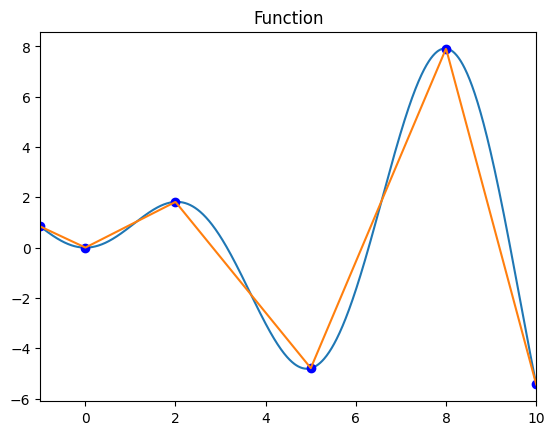

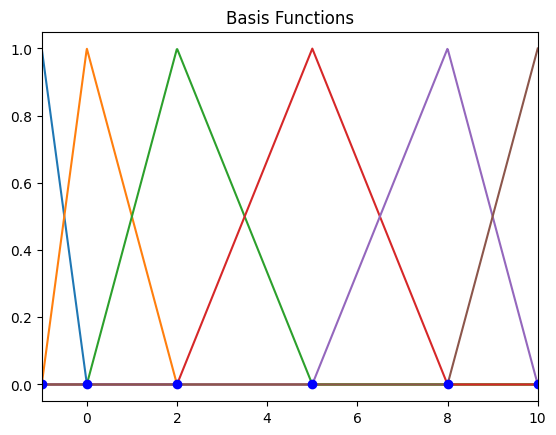

In [120]:
### TEST ###

# approximate with langrage interpolation
basis_functions_lang = create_basis_functions_lagrange(xis)

# Interpolate through (xi, fi) using basis functions phi.
plt.figure()
plt.title('Function')
plt.plot(xs, fs)
plt.plot(xis, fis, 'bo')

y_p = interpolate(xis, fis, basis_functions_lang)
ys_p = list(map(y_p, xs))
plt.plot(xs, ys_p)
plt.xlim(-1,10)

# Plot basis functions.
plt.figure()
plt.title('Basis Functions')
for phi in basis_functions_lang:
    ps = list(map(phi, xs))
    plt.plot(xs, ps)
plt.plot(xis, [0 for _ in range(len(xis))], 'bo')
plt.xlim(-1,10);

Los de volgende vragen op: 


1. Vergelijk de stuksgewijs lineaire interpolant die je hier verkreeg met degene die je in oefening 1 verkreeg. Wat valt er op? Kan je dit verklaren? <br>

2. Hoe ziet de matrix A eruit in het "Lagrangiaans" geval? Kan je dit verklaren? <br>

## 3. Radial Basis Functions

Bij interpolatie worden Radial Basis Functions (RBF) als een transformatie over de inputwaarden $x_i$, zodat lineaire combinatie tussen deze transformaties voldoende is om ons een goede interpolant te geven. Deze functies worden vaak gecentreerd rond de geobserveerde punten. Zo is ook $\Phi_j(x) = |x - x_j|$ een soort van RBF die hetzelfde effect geeft als een stuksgewijze lineaire interpolatie.

Een basisfunctie die vaak gebruik wordt is de Gaussiaanse RBF:

$$\Phi(x)_j = \exp\left(-(x-x_j)^2 \right)$$

Deze functie is lineair onafhankelijk wanneer deze gecentreerd wordt op verschillende punten, en geeft een simpele, maar niet-lineaire transformatie van de input-ruimte. Daarnaast geeft deze een interpolant die differentieerbaar is.

Implementeer een functie die deze RBF implementeert en pas de test-code uit de vorige oefening aan zodat deze gebruik maakt van Gaussiaanse RBFs.

In [121]:
def create_gaussian_rbf(x_j):
    """Create a Gaussian RBF."""
    ### CODE HERE ###
    pass

TypeError: 'NoneType' object is not callable

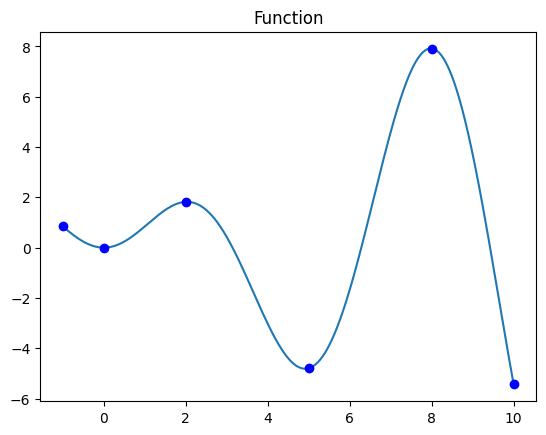

In [122]:
### TEST ###

# Function f
f = lambda x: x*math.sin(x)
xs = np.linspace(-1, 10, 1000)
fs = list(map(f, xs))
plt.title('Function')
plt.plot(xs, fs)

# Data points (xi, fi)
xis = [-1, 0, 2, 5, 8, 10]
fis = list(map(f, xis))
plt.plot(xis, fis, 'bo')

# Create Gaussian RBFs centered around xi
phis = list(map(create_gaussian_rbf, xis))

# Interpolate through (xi, fi) using basis functions phi
y = interpolate(xis, fis, phis)
ys = list(map(y, xs))
plt.plot(xs, ys)
plt.xlim(-1,10)

# Plot basis functions
plt.figure()
plt.title('Basis Functions')
for phi in phis:
    ps = list(map(phi, xs))
    plt.plot(xs, ps)
plt.plot(xis, [0. for _ in range(len(xis))], 'bo')
plt.xlim(-1,10);

## 4. Omgaan met ruis: interpolatie van globale temperatuur

De volgende datapunten geven de globale temperatuur van 1961 tot 1990 (geschaald tussen 0 en 10):

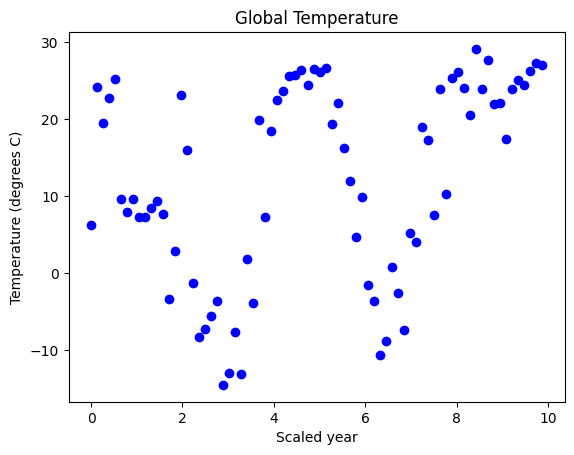

In [123]:
fis_temp = []
with open('global_temperature.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=";")
    
    next(reader)
    for row in reader:
        fis_temp.append(float(row[1].replace(',', '.')))

fis_temp = fis_temp[::6]
xis_temp = [i*10. / len(fis_temp) for i in range(len(fis_temp))]
plt.title('Global Temperature')
plt.xlabel('Scaled year')
plt.ylabel('Temperature (degrees C)')
plt.plot(xis_temp, fis_temp, 'bo');

Ook al is er een duidelijke, oscillerende trend zichtbaar, het is moeilijk om een goede expliciete functie te bepalen die de observaties verklaart. Daarnaast is er ruis zichtbaar, waardoor de datapunten niet meer overeenkomen met de onderliggende functiewaarden. We zullen nu zien hoe we kunnen omgaan met deze ruis.

In veel applicaties hebben we te maken met data die niet honderd procent correct de onderliggende functie weergeeft (ruis). Als we evenveel basisfuncties gebruiken als datapunten, interpoleren we door deze "foutieve" datapunten, waardoor de functie $f(x)$ niet correct benaderd wordt. Dit fenomeen heet overfitting, aangezien het interpolatiemodel complex genoeg is om deze ruis te "fitten", terwijl de onderliggende functie $f(x)$ meestal simpeler is.

Daarom is het dikwijls beter om het interpolatiemodel simpeler op te stellen (namelijk, met minder basisfuncties), zodat deze noise genegeerd wordt. Dit wil zeggen dat we minder onbekenden (coefficienten van de basisfuncties) hebben dan datapunten, waardoor het stelsel geen oplossing meer biedt die aan alle voorwaarden voldoet (i.e., interpoleer door ieder datapunt).
Met andere woorden, het stelsel $Ax = b \Leftrightarrow x = A^{-1}b$ is niet meer oplosbaar, aangezien $A$ niet vierkant meer is, dus geen inverse $A^{-1}$ heeft.

We kunnen echter proberen een benadering te vinden die "zo goed mogelijk" aan de voorwaarden voldoet.
Het idee is dat we een inverse voor een niet-vierkante matrix zullen definieren. Definieer de inverse voor een niet-vierkante matrix en implementeer een interpolatiemethode voor minder basisfuncties dan datapunten.

(Hint: $Ax = b \Rightarrow A'Ax = A'b$)

In [ ]:
def interpolate_LSE(xis, fis, phis):
    """Return an approximate interpolation through points (xi, fi) with basis functions phis."""
    ### CODE HERE ###
    def y(x):
        ### CODE HERE ###
        pass
    return y

In [ ]:
### TEST ###

# Plot temperature data
plt.title('Global Temperature')
plt.xlabel('Scaled year')
plt.ylabel('Temperature (degrees C)')
plt.plot(xis_temp, fis_temp, 'bo')

xs = np.linspace(xis_temp[0], xis_temp[-1], 1000)

# Create Gaussian RBFs centered around ci
cis = np.linspace(xis_temp[0], xis_temp[-1], 10)
phis = list(map(create_gaussian_rbf, cis))

# Interpolate through (xi, fi) using basis functions phi
y = interpolate_LSE(xis_temp, fis_temp, phis)
ys = list(map(y, xs))
plt.plot(xs, ys);